In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**LOAD DATASET**

In [ ]:
from google.colab import files
 
uploaded = files.upload()

#The dataset is attached in the folder. You can download the dataset and upload it on to here by clicking "Choose File". 

Saving Covid Dataset.csv to Covid Dataset (3).csv


In [ ]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['Covid Dataset.csv']))
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


**DATA PREPROCESSING**

In [ ]:
df.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [ ]:
df.replace({'Yes': 1, 'No': 0}, inplace = True)
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [ ]:
from collections import Counter

target_label = df.values[:,-1]
counter = Counter(target_label)
for a,b in counter.items():
 per = b / len(target_label) * 100
 print('Class=%s, Count=%d, Percentage=%.3f%%' % (a, b, per))

Class=1, Count=4383, Percentage=80.659%
Class=0, Count=1051, Percentage=19.341%


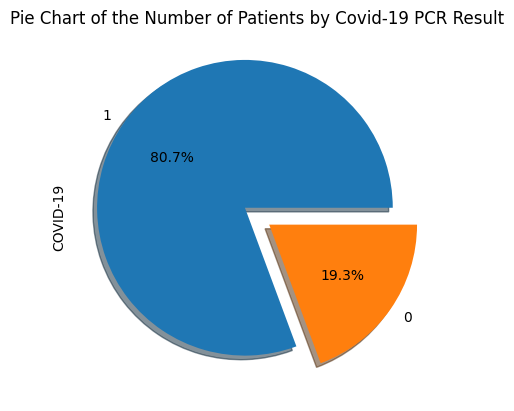

In [ ]:
df["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Pie Chart of Covid-19 Results');

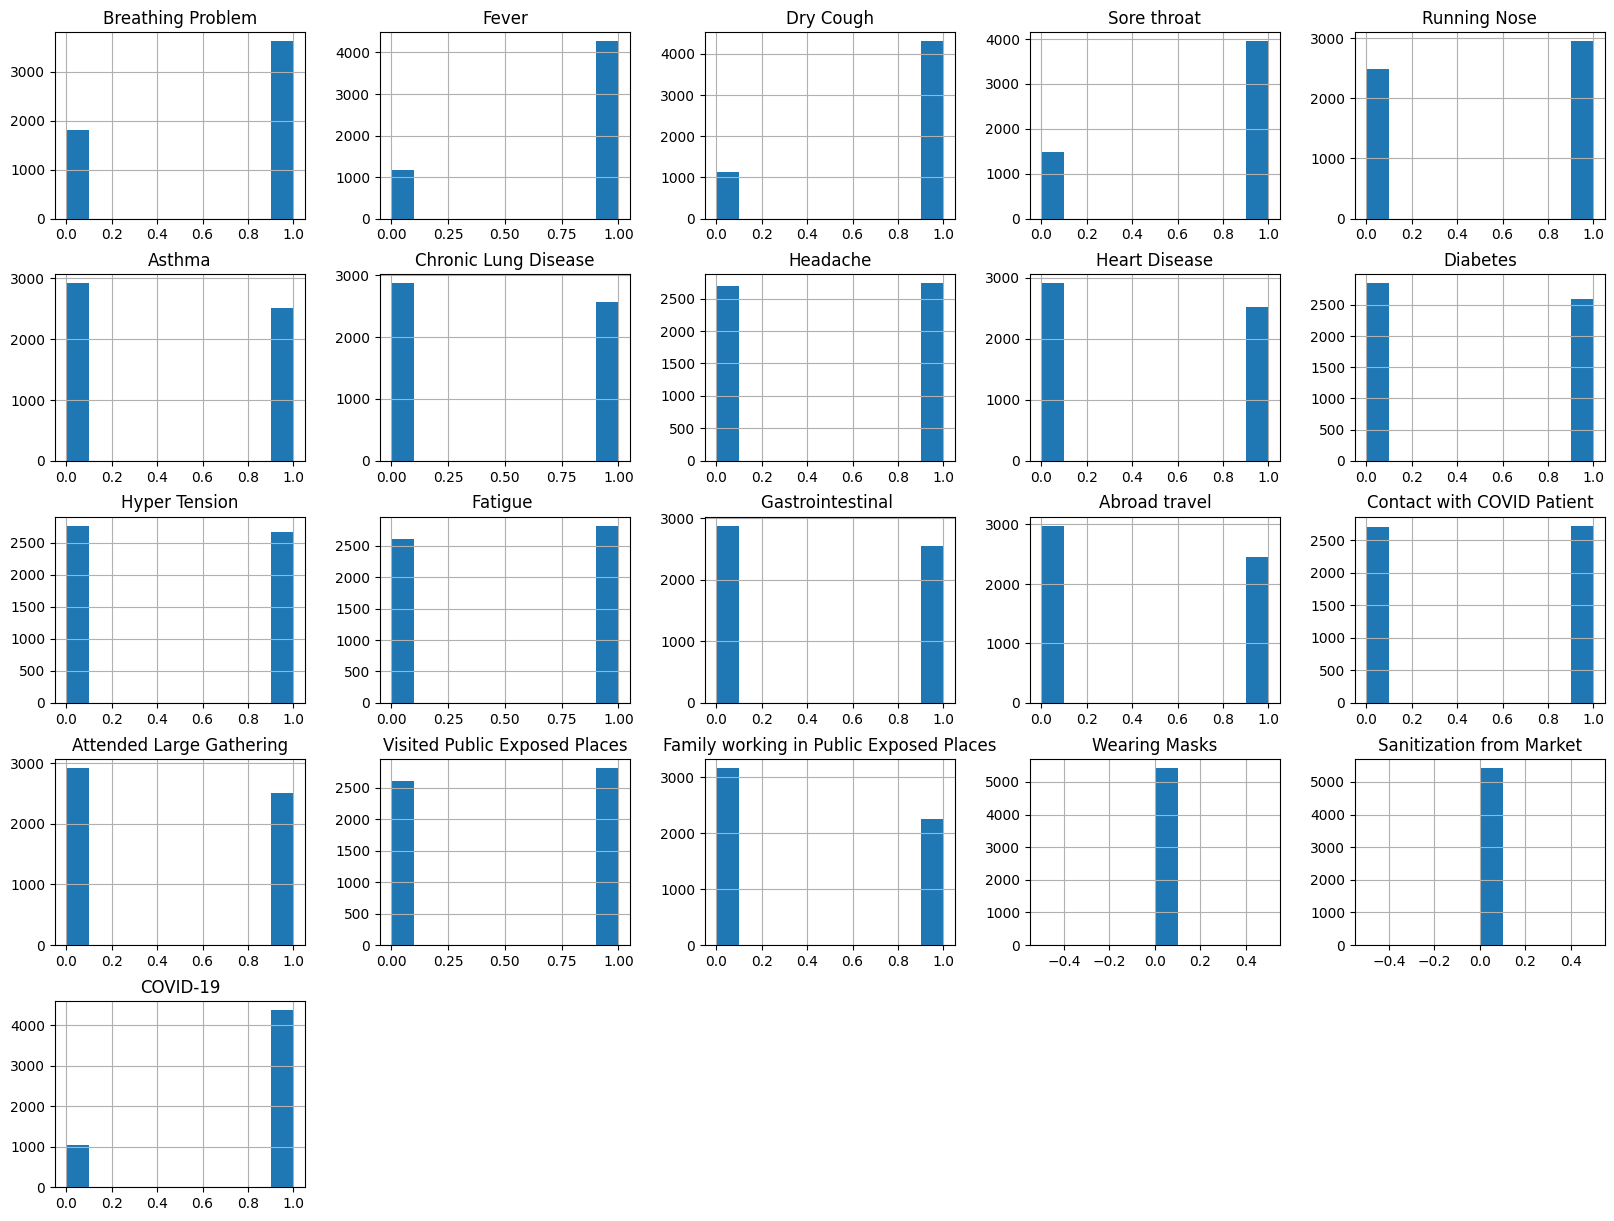

In [ ]:
df.hist(figsize=(20,15));

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**NAIVE BAYES**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

y_pred = classifier.predict(X_test)

print('accuracy is',accuracy_score(y_pred,y_test)*100,"%")

accuracy_nb = accuracy_score(y_pred,y_test)
f1_nb = f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       261
           1       0.99      0.99      0.99      1098

    accuracy                           0.98      1359
   macro avg       0.97      0.97      0.97      1359
weighted avg       0.98      0.98      0.98      1359

[[ 249   12]
 [  15 1083]]
accuracy is 75.64385577630611 %


**SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel='linear') # Linear Kernel
SVM.fit(X_train, y_train)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

y_pred = SVM.predict(X_test)

print('accuracy is',accuracy_score(y_pred,y_test)*100,"%")

accuracy_svm = accuracy_score(y_pred,y_test)
f1_svm = f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.44      1.00      0.61       261
           1       1.00      0.70      0.82      1098

    accuracy                           0.76      1359
   macro avg       0.72      0.85      0.72      1359
weighted avg       0.89      0.76      0.78      1359

[[261   0]
 [331 767]]
accuracy is 96.3944076526858 %


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

y_pred = LR.predict(X_test)

print('accuracy is',accuracy_score(y_pred,y_test)*100,"%")

accuracy_LR = accuracy_score(y_pred,y_test)
f1_LR = f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       261
           1       0.96      1.00      0.98      1098

    accuracy                           0.96      1359
   macro avg       0.98      0.91      0.94      1359
weighted avg       0.97      0.96      0.96      1359

[[ 213   48]
 [   1 1097]]
accuracy is 96.46799116997794 %


**RANDOM FORREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('accuracy is',accuracy_score(y_pred,y_test)*100,"%")

accuracy_rf = accuracy_score(y_pred,y_test)
f1_rf = f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       261
           1       0.99      0.99      0.99      1098

    accuracy                           0.98      1359
   macro avg       0.97      0.97      0.97      1359
weighted avg       0.98      0.98      0.98      1359

[[ 249   12]
 [  15 1083]]
accuracy is 98.01324503311258 %


In [ ]:
import joblib
joblib.dump(rf, 'covid_model.joblib')

['covid_model.joblib']

In [ ]:
models = pd.DataFrame({
    'Model': ['Random Forrest', 'Naive Bayes', 'Support Vector Machine', 'Logistic Regression'],
    'Accuracy Score': [accuracy_rf, accuracy_nb, accuracy_svm, accuracy_LR],
    'F1 Score': [f1_rf, f1_nb, f1_svm, f1_LR]})
models.sort_values(by='Accuracy Score', ascending=False)


,Model,Accuracy Score,F1 Score
0,Random Forrest,0.980132,0.987688
3,Logistic Regression,0.964680,0.978281
2,Support Vector Machine,0.963944,0.978154
1,Naive Bayes,0.756439,0.822520


**FORWARD CHAINING**

In [ ]:
print("Welcome to the COVID-19 diagnosis tool.")
print("Please answer the questions below regarding your symptoms, preconditions, and experiences")

# initialize the symptoms, preconditions, and exposures
symptoms = ['Breathing Problem', 'Fever', 'Dry Cough' , 'Fatigue','Sore Throat', 'Running Nose', 'Headache']
preconditions = ['Diabetes', 'Hyper Tension', 'Heart Disease','Gastrointestinal', 'Asthma', 'Chronic Lung Disease']
exposures = ['Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering', 'Visited Public Exposed Places', 'Family working in Public Exposed Places', 'Wearing Masks', 'Sanitization from Market']

# initialize a dictionary to store the patient's information
facts = {}

# ask the patient for their symptoms
for symptom in symptoms:
    answer = input(f"Do you have {symptom.lower()}? (yes/no): ")
    if answer.lower() == 'yes':
        facts[symptom] = True
    else:
        facts[symptom] = False

# ask the patient for their preconditions
for precondition in preconditions:
    answer = input(f"Do you have {precondition.lower()}? (yes/no): ")
    if answer.lower() == 'yes':
        facts[precondition] = True
    else:
        facts[precondition] = False

# ask the patient for their exposures
for exposure in exposures:
    answer = input(f"Have you had any exposure to {exposure}? (yes/no): ")
    if answer.lower() == 'yes':
        facts[exposure] = True
    else:
        facts[exposure] = False

# apply forward chaining to determine the initial diagnosis
diagnosis = None

#knowledge base and rules 
if facts['Fever'] and facts['Dry Cough'] and facts['Breathing Problem']:
    if facts['Sore Throat'] or facts['Running Nose']:
        diagnosis = 'COVID-19'
    else:
        if facts['Headache'] or facts['Asthma'] or facts['Chronic Lung Disease'] or facts['Fatigue']:
            diagnosis = 'COVID-19'
        else:
            if facts['Diabetes'] or facts['Hyper Tension'] or facts['Gastrointestinal']:
                diagnosis = 'Not COVID-19'
            else:
                if facts['Abroad travel'] or facts['Contact with COVID Patient'] or facts['Attended Large Gathering'] or facts['Visited Public Exposed Places'] or facts['Family working in Public Exposed Places']:
                    diagnosis = 'COVID-19'
                else:
                    if not facts['Wearing Masks'] or not facts['Sanitization from Market']:
                        diagnosis = 'COVID-19'

# use machine learning to refine the diagnosis
if diagnosis == 'COVID-19':
    # prepare the input features for the machine learning model
    input_features = []
    for symptom in symptoms:
        input_features.append(int(facts[symptom]))
    for precondition in preconditions:
        input_features.append(int(facts[precondition]))
    for exposure in exposures:
        input_features.append(int(facts[exposure]))

    # load the machine learning model
    model = joblib.load('covid_model.joblib')

    # use the model to predict the probability of COVID-19
    probability = model.predict_proba([input_features])[0][1]

    # update the diagnosis based on the probability
    if probability < 0.5:
        diagnosis = 'Not COVID-19'

# print the diagnosis
if diagnosis:
    print(f"Based on your symptoms, it's possible that you have {diagnosis}.")
else:
    print("Based on your symptoms, it's unlikely that you have COVID-19.")

print ("Note that this tool should not replace a medical professional's diagnosis and advice.")


Welcome to the COVID-19 diagnosis tool.
Please answer the questions below regarding your symptoms, preconditions, and experiences


KeyboardInterrupt: ignored